In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_images)

In [5]:
# Early Stopping and Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) // 64,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
937/937 [==============================] - ETA: 0s - loss: 0.9797 - accuracy: 0.6357

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


937/937 [==============================] - 53s 53ms/step - loss: 0.9797 - accuracy: 0.6357 - val_loss: 0.6642 - val_accuracy: 0.7453
Epoch 2/50
937/937 [==============================] - 74s 79ms/step - loss: 0.6873 - accuracy: 0.7412 - val_loss: 0.5581 - val_accuracy: 0.7897
Epoch 3/50
937/937 [==============================] - 61s 65ms/step - loss: 0.6015 - accuracy: 0.7748 - val_loss: 0.5095 - val_accuracy: 0.8128
Epoch 4/50
937/937 [==============================] - 50s 54ms/step - loss: 0.5572 - accuracy: 0.7911 - val_loss: 0.4616 - val_accuracy: 0.8309
Epoch 5/50
937/937 [==============================] - 54s 57ms/step - loss: 0.5246 - accuracy: 0.8034 - val_loss: 0.4536 - val_accuracy: 0.8361
Epoch 6/50
937/937 [==============================] - 61s 65ms/step - loss: 0.5008 - accuracy: 0.8129 - val_loss: 0.4387 - val_accuracy: 0.8380
Epoch 7/50
937/937 [==============================] - 71s 76ms/step - loss: 0.4820 - accuracy: 0.8212 - val_loss: 0.4244 - val_accuracy: 0.8432
Epo

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.3266 - accuracy: 0.8812
Test Accuracy: 0.8812000155448914


Fine-tune hyperparameters, model architecture, or explore different optimizers. Also use tools like TensorBoard for more in-depth analysis.

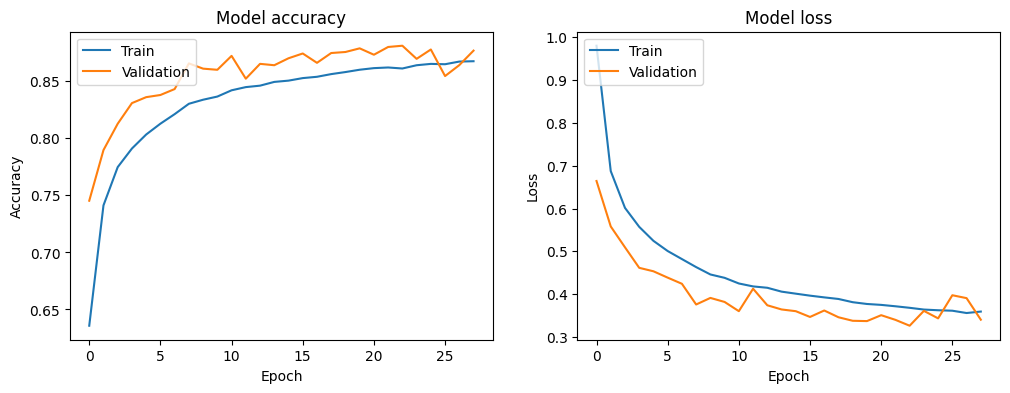

In [10]:
# Visualize learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curves(history)